In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from statistics import mode

def toSentence(list_words): # Convert list of words into sentence
        sentence = ' '.join(word for word in list_words)
        return sentence

data = pd.read_csv("labelled2.csv")
X = data['text_preprocessed'].apply(toSentence) 
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
polarity_encode = {0 : -1, 1 : 1}
y = data['sentiment'].map(polarity_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf7 = GradientBoostingClassifier(random_state=42)
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

pipeline = Pipeline([('classifier', clf7)])
params = [param7]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [2]:
predictions = gs.predict(X_test)

if mode(predictions) == -1:
    hasil_prediksi = "Username is Negative"
elif mode(predictions) == 1:
    hasil_prediksi = "Username is Positive"

print("Prediksi : ",predictions)
print("Hasil Prediksi: ",hasil_prediksi)

Prediksi :  [ 1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1
  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1
  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1
 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1

In [3]:
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.6619537275064268
Test Precision: 0.612987012987013
Test Recall: 0.6742857142857143
Test ROC AUC Score: 0.6630774365821094


In [4]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.65      0.71      0.68       393
           1       0.67      0.61      0.64       385

    accuracy                           0.66       778
   macro avg       0.66      0.66      0.66       778
weighted avg       0.66      0.66      0.66       778



Text(0.5, 1.0, 'Confusion Matrix')

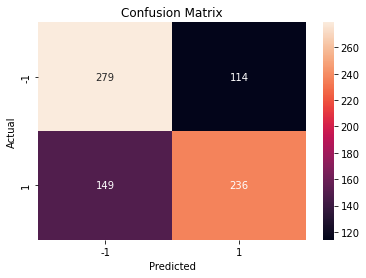

In [5]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, 
    xticklabels=[-1,1], 
    yticklabels=[-1,1],
    fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")